<a href="https://colab.research.google.com/github/AnanLu/PHYS641_2022_solution/blob/main/PS2/PS2_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Problem 1

We are solving $A^T N^{-1} Am=A^T N^{-1} d$ with $QR$, $A=QR$, so we have $R^T Q^T N^{-1} QRm=R^T Q^T N^{-1} d$. $R$ is invertible (if $A$ is non-singular), and Q orthogonal. So we can multiply on the left by $(R^T)^{-1}$, so: $Q^T N^{-1} QRm=Q^T N^{-1} d$. Note that $QQ^T$ is not equal to $I$, just $Q^TQ$, so we can't zap that $Q$. This leaves us with $(Q^T N^{-1}QR)m=(Q^T N^{-1}d)$ or $m=(Q^T N^{-1} Q R)^{-1}(Q^TN^{-1} d)$, or since $QR=A$, we could also write $(Q^T N^{-1} A)^{-1} (Q^T N^{-1} d)$, where the second way is probably a bit more numerically stable than the first. Also, if we don't have a noise matrix, then we *can* cancel out a $Q^TQ$ to simplify a bit. That leaves us with $(Q^T Q R)m=Q^Td$, or $Rm=Q^Td$, $m=R^{-1} Q^T d$.

reference fitp is  [ 2.53358409e+00 -3.47041845e-01 -1.72807384e+00  7.26158905e+00
  7.32871933e+01 -1.28680420e+02 -9.08764404e+02  1.18781250e+03
  7.12655762e+03 -5.65970312e+03 -3.31576133e+04  1.30935000e+04
  9.23569727e+04 -3.10112500e+03 -1.49937719e+05 -6.58225000e+04
  1.11713500e+05  1.86186250e+05  4.87692500e+04 -2.35362750e+05
 -1.84865750e+05  1.08345000e+05  1.54752875e+05  8.37838750e+04
 -3.48004375e+04 -1.45609781e+05 -2.47975000e+04  7.88862969e+04
  1.61750000e+04 -1.58059609e+04 -2.49429688e+03]
noiseless QR fitp is  [ 2.48331501e+00  5.40749628e-02  2.46877126e+00 -4.03084156e-01
 -1.08777308e+02  6.86750592e+01  3.96968795e+03 -1.75911166e+03
 -7.04550320e+04  1.70560282e+04  7.10572482e+05 -7.54010274e+04
 -4.51958595e+06  9.19630856e+04  1.93201558e+07  6.12261608e+05
 -5.76536131e+07 -3.51525686e+06  1.22578895e+08  9.13000106e+06
 -1.86893214e+08 -1.43466359e+07  2.02889717e+08  1.43783699e+07
 -1.53101771e+08 -9.01999881e+06  7.63281916e+07  3.23801754e+06

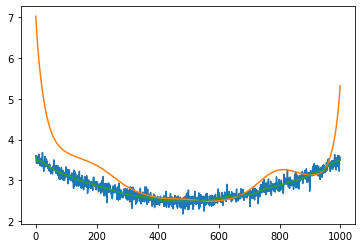

In [ ]:
def linfit_qr(d,A,N=None):
    Q,R=np.linalg.qr(A)
    if N is None:
        Rinv=np.linalg.inv(R)
        QTd=np.dot(Q.transpose(),d)
        fitp=np.dot(Rinv,QTd)
        return fitp
    else:
        #if we do have a noise, note that if we have N^-1d and N^-1A, we don't need to do anything else
        #it's much faster to make them if N is diagonal, so have a separate code path for diagonal
        #vs. full correlation matrix noise.
        if len(N.shape)==1:  #check for a diagonal noise, which will go faster
            Ninv_d=d/N
            Ninv_A=np.zeros(A.shape)
            for i in range(A.shape[1]):
                Ninv_A[:,i]=A[:,i]/N
        else:
            Ninv=np.linalg.inv(N)
            Ninv_d=np.dot(Ninv,d)
            Ninv_A=np.dot(Ninv,A)
        #once we have Ninv_A and Ninv_d, the two paths look the same
        lhs=np.dot(Q.transpose(),Ninv_A)
        rhs=np.dot(Q.transpose(),Ninv_d)
        lhs_inv=np.linalg.inv(lhs)
        fitp=np.dot(lhs_inv,rhs)
        return fitp


npt=1000

x=np.linspace(-1,1,npt)
y_true=x**2+2.5
y=y_true+np.random.randn(npt)*0.1
ord=30
A=np.zeros([npt,ord+1])
A[:,0]=1.0
for i in range(ord):
    A[:,i+1]=x*A[:,i]

#lets check with an explicit noise matrix set to constant along diagonal to make sure code behaves correctly
N1=np.ones(npt)*3.0
N2=np.eye(npt)*3.0

fitp0=linfit_qr(y,A)
fitp1=linfit_qr(y,A,N1)
fitp2=linfit_qr(y,A,N2)

pred0=np.dot(A,fitp0)
pred1=np.dot(A,fitp1)
pred2=np.dot(A,fitp2)
scat2=np.std(y-pred2)

lhs_ref=np.dot(A.transpose(),A)
rhs_ref=np.dot(A.transpose(),y)
fitp_ref=np.dot(np.linalg.inv(lhs_ref),rhs_ref)
pred_ref=np.dot(A,fitp_ref)
scat_ref=np.std(y-pred_ref)

print('reference fitp is ',fitp_ref)
print('noiseless QR fitp is ',fitp0)
print('diagonal noise QR fitp is ',fitp1)
print('matrix noise QR fitp is ',fitp2)

print('for ',ord,'th order fit, ratio of RMS residuals is ',scat_ref/scat2)

plt.plot(y)
plt.plot(pred_ref)
# plt.plot(pred0)
# plt.plot(pred1)
plt.plot(pred2)

# Problem 2

### Part (1) fit a Chebyshev polynomial to exp(x)

for order  100  fit, rms and max errors are   3.494682818177782e-15 1.4166445794216997e-13


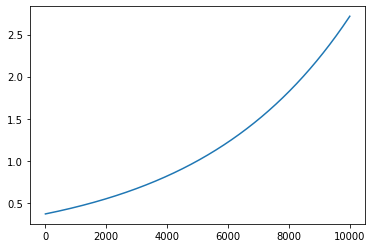

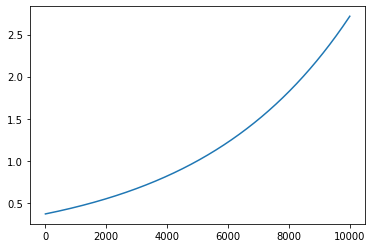

In [ ]:
def cheb_mat(x,ord):
    mat=np.zeros([len(x),ord+1])
    mat[:,0]=1.0
    mat[:,1]=x
    for i in range(1,ord):
        mat[:,i+1]=2*x*mat[:,i]-mat[:,i-1]
    return mat

x=np.linspace(-1,1,10000)
y=np.exp(x)
ord=100
mat=cheb_mat(x,ord)
lhs=np.dot(mat.transpose(),mat)
rhs=np.dot(mat.transpose(),y)
lhs_inv=np.linalg.inv(lhs)
fitp=np.dot(lhs_inv,rhs)

pred=np.dot(mat,fitp)

#print RMS error - if this number is large, our fit did not do well
fit_rms=np.std(pred-y)
fit_max=np.max(np.abs(pred-y))
print('for order ',ord,' fit, rms and max errors are  ',fit_rms,fit_max)

plt.plot(y)
plt.show()
plt.plot(pred)
plt.show()


### Part (2)

In [ ]:
trunc=6
fitp_trunc=fitp.copy()
fitp_trunc[trunc+1:]=0
max_predicted=np.sum(np.abs(fitp[trunc+1:])) #max error we could have gotten from the coefficients we dropped

pred_trunc=np.dot(mat,fitp_trunc)
trunc_rms=np.std(y-pred_trunc)
trunc_max=np.max(np.abs(y-pred_trunc))
print('for order ',trunc,' truncation of', ord,' order fit, rms and max errors are ',trunc_rms,trunc_max)
print('for order ',trunc,' truncation of', ord,' order fit, predicted max error (from the sum of dropped coefficients) is ',max_predicted,' with ratio ',trunc_max/max_predicted) #this number sould be no more than 1


mat_trunc=cheb_mat(x,trunc)
lhs=np.dot(mat_trunc.transpose(),mat_trunc)
rhs=np.dot(mat_trunc.transpose(),y)
fitp=np.dot(np.linalg.inv(lhs),rhs)
pred=np.dot(mat_trunc,fitp)

fit_rms=np.std(pred-y)
fit_max=np.max(np.abs(pred-y))
print('for order ',trunc,' fit, rms and max errors are ',fit_rms,fit_max)


for order  6  truncation of 100  order fit, rms and max errors are  2.2576897669099967e-06 3.4092623475423522e-06
for order  6  truncation of 100  order fit, predicted max error (from the sum of dropped coefficients) is  3.409262489927617e-06  with ratio  0.9999999582357577
for order  6  fit, rms and max errors are  1.9728492566479276e-06 8.140894895092288e-06


# Problem 3

if you work through the math, you need to scale gaussian noise by the square root of the eigenvalues then multiply by the eigenvectors. Note that eigh assumes input matrix is symmetric, and is more stable than eig for our purposes. Also, if we want to simulate many sets of data, there's no point finding the eigenvalues/eigenvectors lots of times. Let nset be the number of simulated datasets you want.

RMS error is  0.00565341109296442


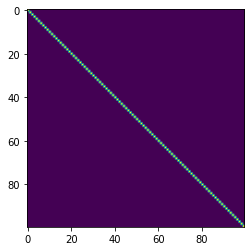

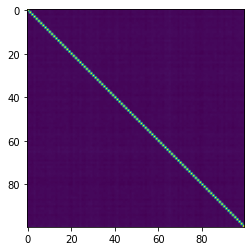

In [ ]:
def simulate_corrnoise(mat,nset=1):
    e,v=np.linalg.eigh(mat)
    e[e<0]=0 #make sure we don't have any negative eigenvalues due to roundoff
    n=len(e)
    #make gaussian random variables
    g=np.random.randn(n,nset)
    #now scale them by the square root of the eigenvalues
    rte=np.sqrt(e)
    for i in range(nset):
        g[:,i]=g[:,i]*rte
    #and rotate back into the original space
    dat=np.dot(v,g)
    return dat
    

n=100
nset=100000
mat=np.ones([n,n])+np.eye(n) #make the noise matrix that is one everywhere but 2 along diagonal

dat=simulate_corrnoise(mat,nset)

mat_sim=np.dot(dat,dat.transpose())/nset
print('RMS error is ',np.std(mat-mat_sim))

plt.imshow(mat)
plt.show()
plt.imshow(mat_sim)
plt.show()


# Problem 4

### Part (a)

for a  0.1  and sigma  5.0  error is  0.15576335487646098
for a  0.1  and sigma  50.0  error is  0.3377448956231586
for a  0.1  and sigma  500.0  error is  0.12757498758982017
for a  0.5  and sigma  5.0  error is  0.2759993508033392
for a  0.5  and sigma  50.0  error is  0.7140544770562312
for a  0.5  and sigma  500.0  error is  0.10066392140726649
for a  0.9  and sigma  5.0  error is  0.35789525996363847
for a  0.9  and sigma  50.0  error is  0.9499319468584452
for a  0.9  and sigma  500.0  error is  0.048925494668153706


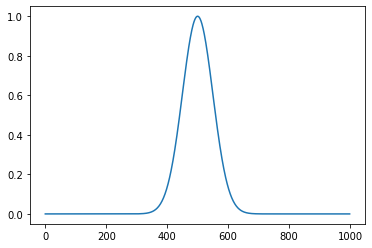

In [ ]:
x=np.arange(1000)
n=len(x)
#make the signal vector we want
y=np.exp(-0.5*(x-500.0)**2/50.0**2)

plt.plot(y)

#next, make a matrix that has delta x in it.
#lots of ways to do this, but this is one which is fast
xmat=np.repeat([x],len(x),axis=0)
dx=xmat-xmat.transpose()

for a in [0.1,0.5,0.9]:
    for sig in [5.0,50.0,500.0]:
        N=a*np.exp(-0.5*dx**2/sig**2)+(1-a)*np.eye(n)
        Ninv=np.linalg.inv(N)
        lhs=np.dot(y,np.dot(Ninv,y))
        err=1/np.sqrt(lhs)
        print('for a ', a,' and sigma ',sig,' error is ',err)


In [ ]:
np.exp(-0.5*900**2/5**2)

0.0

### Part (b)

The worst error bars are for a=0.9 and sigma=50.  The reason is that the correlated noise in this case looks just like the signal we're searching for, which also has 50 sample width.  So, it's going to be very hard to tell a true source from a noise fluctuation.  The best case is a=0.9 and sigma=500.  For large values of a, most of the noise is in the correlations, not the white part.  When the correlation length is very long, then the noise has a hard time making short bumps, so our source is going to stand out. 

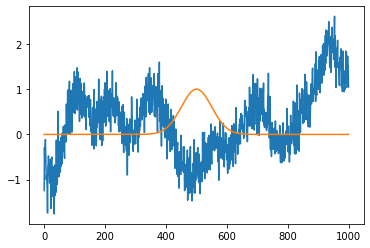

In [ ]:
a_worst = 0.9
sig_worst = 50
N_worst=a_worst*np.exp(-0.5*dx**2/sig_worst**2)+(1-a_worst)*np.eye(n)
# plt.imshow(N_worst)

dat=simulate_corrnoise(N_worst,1)
plt.plot(dat)
plt.plot(y)

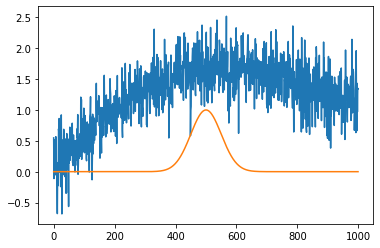

In [ ]:
a_best = 0.9
sig_best = 500
N_best=a_best*np.exp(-0.5*dx**2/sig_best**2)+(1-a_best)*np.eye(n)
# plt.imshow(N_best)

datb=simulate_corrnoise(N_best,1)
plt.plot(datb)
plt.plot(y)